<a href="https://colab.research.google.com/github/MEGlantz/Russian_Presidents_NLP/blob/main/HuggingFaceModellingofSpeeches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 19.7 MB/s eta 0:00:00


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.19.0
    Uninstalling huggingface-hub-0.19.0:
      Successfully uninstalled huggingface-hub-0.19.0


In [ ]:
from datasets import Dataset

In [ ]:
pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.9 MB/s eta 0:00:00


In [ ]:
import torch
import accelerate
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments


In [ ]:
from datasets import load_dataset



In [ ]:
pip install jsonlines

In [ ]:

import jsonlines

data = []

with jsonlines.open('/content/drive/MyDrive/DATA/data/transcripts_en_2023-01-16.json', 'r') as reader:
    for line in reader:
        data.append(line)

# Now you have the data as a list of dictionaries
# You can perform further processing or save it to a file if needed

# Example: Print the content of each JSON object
for item in data:
    print(item)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'date': '2012-09-19T18:30:00', 'persons': [], 'transcript_unfiltered': 'President of Kazakhstan Nursultan Nazarbayev: Mr President, ladies and gentlemen, I want to once again welcome the President of Russia, all of our Russian friends and the Russian delegation to Pavlodar, where we are holding our annual Forum of our nation’s regions. We held the IX Interregional Cooperation Forum, which focused on Innovation Cooperation, in one of Kazakhstan’s largest industrial centres, the city of Pavlodar. Choosing this city was no accident: neighbouring states account for up to 70 percent of trade turnover in Pavlodar Region. This region generates 40 percent of our nation’s electric power and produces 100 percent of its metallic aluminium; it also has well-developed chemical and agricultural sectors. The expansion of Ekibastuz GRES-2 power station, which is a joint venture with Russia with an investment volume of one billion dollars, and launching the third power generating unit – all this is ve

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'date': '2022-12-07T19:35:00', 'persons': [], 'transcript_unfiltered': "President of Russia Vladimir Putin: Good afternoon, colleagues. First, I would like to congratulate you on the upcoming Human Rights Day. By tradition, our meetings are timed to this event. It directly concerns each of you, as well as the council's experts, consultants, and office staff. Your joint work to protect the rights, freedoms and lawful interests of the people is a continuing operation. For many of you, these multifaceted activities – it would be no exaggeration to describe it like this – have essentially become your destiny, a calling and a life-long mission that inspires others. You are putting your heart into this work, sparing no time and effort to help those who need care and support. I would like to sincerely thank you for this very responsible and noble mission. It is gratifying that you do not relax your activities in the areas that the council continuously keeps in focus. These include education,

In [ ]:


# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data)

In [ ]:
df.head()

,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist
0,1999-12-31T00:01:00,[],"Vladimir Putin: Dear friends, On New Year’s Ev...",22280,"The Kremlin, Moscow",New Year Address by Acting President Vladimir ...,,[],"Dear friends, On New Year’s Eve, my family and...","[dear, friend, ,, on, New, Year, ’s, Eve, ,, m..."
1,1999-12-31T00:02:00,[],"Vladimir Putin: Good afternoon, distinguished ...",22326,"The Kremlin, Moscow",Address at an expanded meeting of the Russian ...,,[],"Good afternoon, distinguished colleagues. This...","[good, afternoon, ,, distinguished, colleague,..."
2,1999-12-31T00:03:00,[],"Boris Yeltsin: Dear Russians, In a few hours w...",24080,"The Kremlin, Moscow",Statement by Boris Yeltsin,,[],,[]
3,2000-01-04T00:00:00,[],"Question: Mr Putin, the sudden resignation of ...",24377,Moscow,Interview with the ORT TV Channel,,[],Let’s try. It was about ten days before the Ne...,"[let, ’s, try, ., , it, be, about, ten, day, ..."
4,2000-01-11T00:00:00,[],"Vladimir Putin: Dear friends, We are again gat...",24116,"State Kremlin Palace, Moscow",Speech at gala function marking the second mil...,,[],"Dear friends, We are again gathered here today...","[dear, friend, ,, we, be, again, gather, here,..."


In [ ]:
# Segment Dataframe (keeping only date, title, and unfiltered_transcript)
# Maximum sequence length for your model
max_seq_length = 512

# Define a function to segment the text and retain metadata
def segment_text(row):
    date = row['date']
    title = row['title']
    transcript = row['transcript_unfiltered']

    # Segment the transcript into chunks
    text_chunks = [transcript[i:i+max_seq_length] for i in range(0, len(transcript), max_seq_length)]

    # Create a list of dictionaries to preserve metadata for each chunk
    segmented_data = [{'Date': date, 'Title': title, 'Segmented_Transcript': chunk} for chunk in text_chunks]

    return segmented_data

# Apply the segmentation function to the entire DataFrame
segmented_data = df.apply(segment_text, axis=1)

# Create a new DataFrame from the segmented data
segmented_df = pd.DataFrame([item for sublist in segmented_data for item in sublist])

# Display the segmented DataFrame
print(segmented_df)


                       Date  \
0       1999-12-31T00:01:00   
1       1999-12-31T00:01:00   
2       1999-12-31T00:01:00   
3       1999-12-31T00:01:00   
4       1999-12-31T00:02:00   
...                     ...   
157032  2023-01-13T14:35:00   
157033  2023-01-13T14:35:00   
157034  2023-01-13T14:35:00   
157035  2023-01-13T14:35:00   
157036  2023-01-13T14:35:00   

                                                    Title  \
0       New Year Address by Acting President Vladimir ...   
1       New Year Address by Acting President Vladimir ...   
2       New Year Address by Acting President Vladimir ...   
3       New Year Address by Acting President Vladimir ...   
4       Address at an expanded meeting of the Russian ...   
...                                                   ...   
157032                     Comment for Rossiya TV channel   
157033                     Comment for Rossiya TV channel   
157034                     Comment for Rossiya TV channel   
157035           

In [ ]:
segmented_df.to_csv('/content/drive/MyDrive/DATA 495/segmented_transcripts.csv')

In [ ]:
# save smaller section of segmented_df to csv
segmented_df_short = segmented_df.iloc[0:100]

In [ ]:
segmented_df_short.head()

,Date,Title,Segmented_Transcript
0,1999-12-31T00:01:00,New Year Address by Acting President Vladimir ...,"Vladimir Putin: Dear friends, On New Year’s Ev..."
1,1999-12-31T00:01:00,New Year Address by Acting President Vladimir ...,a minute. I promise you that any attempts to a...
2,1999-12-31T00:01:00,New Year Address by Acting President Vladimir ...,"own, the president acted in full compliance wi..."
3,1999-12-31T00:01:00,New Year Address by Acting President Vladimir ...,kindest and the most loved holiday in Russia....
4,1999-12-31T00:02:00,Address at an expanded meeting of the Russian ...,"Vladimir Putin: Good afternoon, distinguished ..."


In [ ]:
segmented_df_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  100 non-null    datetime64[ns]
 1   Title                 100 non-null    object        
 2   Segmented_Transcript  100 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.5+ KB


In [ ]:
# create year column
segmented_df_short['Date'] = pd.to_datetime(segmented_df_short['Date'])

<ipython-input-79-19dc53ccd092>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmented_df_short['Date'] = pd.to_datetime(segmented_df_short['Date'])


In [ ]:
segmented_df_short['Year'] = segmented_df_short['Date'].dt.year

<ipython-input-81-dc9f1ab1e8a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmented_df_short['Year'] = segmented_df_short['Date'].dt.year


In [ ]:
# save segmented_df_short as csv
segmented_df_short.to_csv('/content/drive/MyDrive/DATA 495/segmented_short.csv', index=False)

In [ ]:
# load as a hugging face dataset
segmented_short = load_dataset("csv", data_files="/content/drive/MyDrive/DATA 495/segmented_short.csv")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
segmented_short

DatasetDict({
    train: Dataset({
        features: ['Date', 'Title', 'Segmented_Transcript', 'Year'],
        num_rows: 100
    })
})

In [ ]:
# Define the split ratios (e.g., 80% for training, 20% for testing)
train_ratio = 0.8
test_ratio = 1 - train_ratio

# Split the data into training and test sets
train_dataset = segmented_short['train'].train_test_split(test_size=test_ratio)
test_dataset = train_dataset['test']
train_dataset = train_dataset['train']

In [ ]:
# Load model directly


tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-roberta-large")
model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-roberta-large")

In [ ]:
# Define a function to tokenize a specific column
def tokenize_column(batch):
    return tokenizer(batch['Segmented_Transcript'], padding=True, truncation=True)



In [ ]:
# Tokenize the specific column
tokenized_short = segmented_short.map(tokenize_column, batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:


# load tokenizer and model, create trainer
model_name = "j-hartmann/emotion-english-roberta-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

trainer = Trainer(model=model)

In [ ]:
# Assuming you have a dataset containing only a 'train' split
train_dataset = tokenized_short['train']

# Run predictions on the 'train' split
predictions = trainer.predict(train_dataset)



In [ ]:
import numpy as np

In [ ]:
# Transform predictions to labels
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [ ]:
# scores raw
temp = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True))

In [ ]:
# pred_texts as column name containing the text samples in the dataset
pred_texts = train_dataset['Title']  # You can use 'test' or 'validation' instead of 'train' if needed


In [ ]:
# work in progress
# container
anger = []
disgust = []
fear = []
joy = []
neutral = []
sadness = []
surprise = []

# extract scores (as many entries as exist in pred_texts)
for i in range(len(pred_texts)):
  anger.append(temp[i][0])
  disgust.append(temp[i][1])
  fear.append(temp[i][2])
  joy.append(temp[i][3])
  neutral.append(temp[i][4])
  sadness.append(temp[i][5])
  surprise.append(temp[i][6])

In [ ]:
# Create DataFrame with texts, predictions, labels, and scores
df = pd.DataFrame(list(zip(pred_texts, preds,labels,scores,  anger, disgust, fear, joy, neutral, sadness, surprise)), columns=['text','pred','label','score', 'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'])
df.head()

,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise
0,New Year Address by Acting President Vladimir ...,5,sadness,0.620263,0.086754,0.025621,0.088218,0.051659,0.099013,0.620263,0.028473
1,New Year Address by Acting President Vladimir ...,4,neutral,0.387280,0.381828,0.050218,0.136920,0.017879,0.387280,0.019315,0.006560
2,New Year Address by Acting President Vladimir ...,3,joy,0.879539,0.008654,0.007884,0.002745,0.879539,0.081518,0.014070,0.005590
3,New Year Address by Acting President Vladimir ...,3,joy,0.950798,0.001942,0.001510,0.000501,0.950798,0.019587,0.003814,0.021847
4,Address at an expanded meeting of the Russian ...,4,neutral,0.745792,0.057704,0.033110,0.019957,0.118155,0.745792,0.020820,0.004461


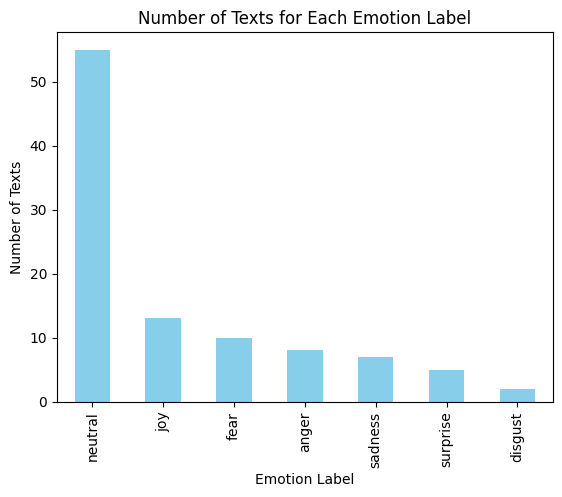

In [ ]:
import matplotlib.pyplot as plt


# Assuming you have a DataFrame df containing the data
# Replace df with your actual DataFrame if needed

# Group by 'label' and count the number of texts for each label
label_counts = df['label'].value_counts()

# Plotting
label_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Texts')
plt.title('Number of Texts for Each Emotion Label')
plt.show()


# Work on Normal Dataset

In [ ]:
segmented_transcripts = load_dataset("csv", data_files="/content/drive/MyDrive/DATA 495/segmented_transcripts.csv")

In [ ]:
segmented_transcripts

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'Date', 'Title', 'Segmented_Transcript'],
        num_rows: 157037
    })
})

In [ ]:
segmented_transcripts.set_format(type="pandas")

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(segmented_transcripts["train"][:])

In [ ]:
df = segmented_transcripts["train"][:]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157037 entries, 0 to 157036
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            157037 non-null  int64 
 1   Date                  157037 non-null  object
 2   Title                 157037 non-null  object
 3   Segmented_Transcript  157037 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.8+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157037 entries, 0 to 157036
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            157037 non-null  int64         
 1   Date                  157037 non-null  datetime64[ns]
 2   Title                 157037 non-null  object        
 3   Segmented_Transcript  157037 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.8+ MB


In [ ]:
# Extract the year from the 'Date' column and store it in a new column
df['Year'] = df['Date'].dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157037 entries, 0 to 157036
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            157037 non-null  int64         
 1   Date                  157037 non-null  datetime64[ns]
 2   Title                 157037 non-null  object        
 3   Segmented_Transcript  157037 non-null  object        
 4   Year                  157037 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 6.0+ MB


In [ ]:
segmented_transcripts.reset_format()

In [ ]:
import matplotlib.pyplot as plt

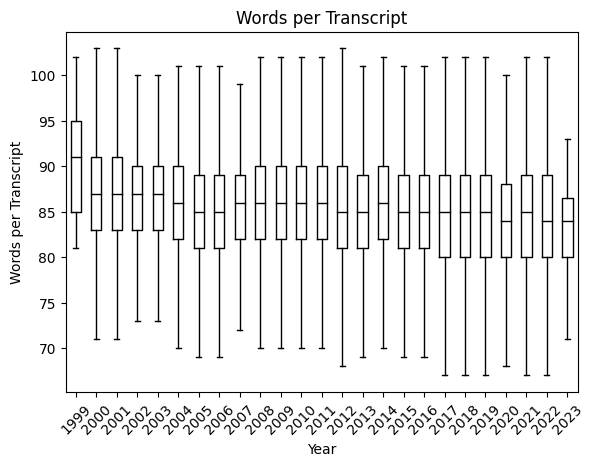

In [ ]:
# Calculate the words per transcript
df["Words per Transcript"] = df["Segmented_Transcript"].str.split().apply(len)

# Create a box plot grouped by year
df.boxplot("Words per Transcript", by="Year", grid=False, showfliers=False, color='black')

# Customize the plot labels
plt.suptitle("")
plt.xlabel("Year")
plt.ylabel("Words per Transcript")

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Define the split ratios (e.g., 80% for training, 20% for testing)
train_ratio = 0.8
test_ratio = 1 - train_ratio

# Split the data into training and test sets
train_dataset = segmented_transcripts['train'].train_test_split(test_size=test_ratio)
test_dataset = train_dataset['test']
train_dataset = train_dataset['train']

In [ ]:
# Load model directly


tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-roberta-large")
model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-roberta-large")

In [ ]:
# Define a function to tokenize a specific column
def tokenize_column(batch):
    return tokenizer(batch['Segmented_Transcript'], padding=True, truncation=True)



In [ ]:
# Tokenize the specific column
tokenized_data = segmented_transcripts.map(tokenize_column, batched=True)

In [ ]:


# load tokenizer and model, create trainer
model_name = "j-hartmann/emotion-english-roberta-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

trainer = Trainer(model=model)

#### Full dataset


In [ ]:

train_dataset = tokenized_data['train']

# Run predictions on the 'train' split
predictions = trainer.predict(train_dataset)



In [ ]:
# pred_texts as column name containing the text samples in the dataset
pred_texts = train_dataset['Title']  # You can use 'test' or 'validation' instead of 'train' if needed


In [ ]:
# Transform predictions to labels
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [ ]:
# scores raw
temp = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True))

In [ ]:
# work in progress
# container
anger = []
disgust = []
fear = []
joy = []
neutral = []
sadness = []
surprise = []

# extract scores (as many entries as exist in pred_texts)
for i in range(len(pred_texts)):
  anger.append(temp[i][0])
  disgust.append(temp[i][1])
  fear.append(temp[i][2])
  joy.append(temp[i][3])
  neutral.append(temp[i][4])
  sadness.append(temp[i][5])
  surprise.append(temp[i][6])

In [ ]:
# Create DataFrame with texts, predictions, labels, and scores
df = pd.DataFrame(list(zip(pred_texts,preds,labels,scores,  anger, disgust, fear, joy, neutral, sadness, surprise)), columns=['text','pred','label','score', 'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'])
df.head()

,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise
0,New Year Address by Acting President Vladimir ...,5,sadness,0.620263,0.086754,0.025621,0.088218,0.051659,0.099013,0.620263,0.028473
1,New Year Address by Acting President Vladimir ...,4,neutral,0.387280,0.381828,0.050218,0.136920,0.017879,0.387280,0.019315,0.006560
2,New Year Address by Acting President Vladimir ...,3,joy,0.879539,0.008654,0.007884,0.002745,0.879539,0.081518,0.014070,0.005590
3,New Year Address by Acting President Vladimir ...,3,joy,0.950798,0.001942,0.001510,0.000501,0.950798,0.019587,0.003814,0.021847
4,Address at an expanded meeting of the Russian ...,4,neutral,0.745792,0.057704,0.033110,0.019957,0.118155,0.745792,0.020820,0.004461


In [ ]:
# save results to csv

df.to_csv("/content/drive/MyDrive/DATA 495/modeled_data_emotion-english-roberta-large.csv")

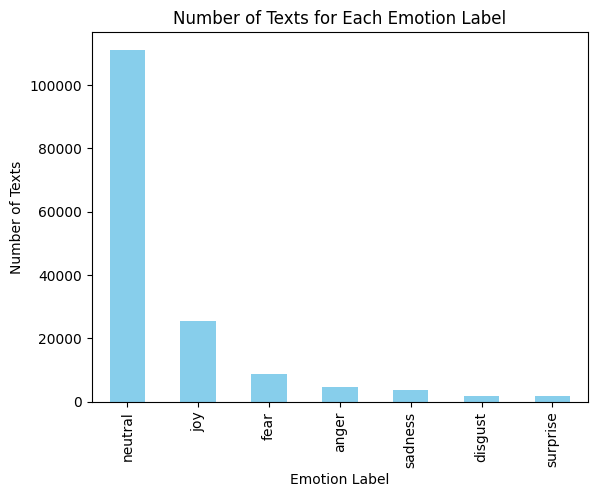

In [ ]:

# Group by 'label' and count the number of texts for each label
label_counts = df['label'].value_counts()

# Plotting
label_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Texts')
plt.title('Number of Texts for Each Emotion Label')
plt.show()
